In [1]:
user_name = 'celia'

In [2]:
import sys
sys.path.append('/Users/{}/GitHub/mouse_bandit/data_preprocessing_code'.format(user_name))
sys.path.append('/Users/{}/GitHub/mouse_bandit'.format(user_name))
import support_functions as sf
import numpy as np
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import add_columns_feature_matrix as fm_add
%matplotlib inline

In [4]:
record = pd.read_csv('/Users/{}/GitHub/mouse_bandit/celia_session_record.csv'.format(user_name),index_col=0)

data=pd.read_csv('/Users/{}/GitHub/mouse_bandit/data/processed_data/markov_master.csv'.format(user_name),index_col=0)
data.shape

(259890, 53)

In [5]:
data90 = pd.read_csv('/Users/{}/GitHub/mouse_bandit/data/processed_data/markov_9010.csv'.format(user_name),index_col=0)
data80 = pd.read_csv('/Users/{}/GitHub/mouse_bandit/data/processed_data/markov_8020.csv'.format(user_name),index_col=0)
data70 = pd.read_csv('/Users/{}/GitHub/mouse_bandit/data/processed_data/markov_7030.csv'.format(user_name),index_col=0)
data90['Condition'] = '90-10'
data80['Condition'] = '80-20'
data70['Condition'] = '70-30'
data = data90.append(data80)
data = data.append(data70)

# add single index sequence for all rows
data = data.reset_index()
data.shape

data = fm_add.add_block_ids(data, record, [], user_name)
data.tail(5)

,index,Mouse ID,Session ID,Trial,Block Trial,Block Reward,Port Streak,Reward Streak,10_Port,10_Reward,...,1_trialDuration,0_ITI,0_trialDuration,Decision,Switch,Higher p port,Reward,Condition,Block ID,Current Block Length
321466,788,Dill,01262018_Dill,799.0,79.0,43.0,1.0,1.0,0.0,1.0,...,0.650,1.258,0.583,0.0,0.0,1.0,0.0,70-30,14.0,84.0
321467,789,Dill,01262018_Dill,800.0,80.0,43.0,2.0,-1.0,1.0,0.0,...,0.583,29.830,0.640,1.0,1.0,0.0,0.0,70-30,14.0,84.0
321468,790,Dill,01262018_Dill,801.0,81.0,43.0,1.0,-2.0,0.0,1.0,...,0.640,1.491,0.307,1.0,0.0,0.0,0.0,70-30,14.0,84.0
321469,791,Dill,01262018_Dill,802.0,82.0,43.0,2.0,-3.0,0.0,0.0,...,0.307,12.839,0.566,1.0,0.0,0.0,1.0,70-30,14.0,84.0
321470,792,Dill,01262018_Dill,803.0,83.0,44.0,3.0,1.0,1.0,1.0,...,0.566,1.426,0.689,1.0,0.0,0.0,0.0,70-30,14.0,84.0


In [6]:
data_match_blocks = data[data['Current Block Length']<90] # take only blocks with fewer than 90 trials
data_match_blocks = data_match_blocks[data_match_blocks['Current Block Length']>50] # blocks with 30+ trials
datas = data_match_blocks.copy()

In [13]:
# some stats
print('TOTALS')
print('# trials included =', datas.shape[0])

print('# sessions included =', len(np.unique(datas['Session ID'])))# sessions that contain blocks of these lengths

temp = np.diff(datas['Block ID'].values)
print('# blocks =', np.sum(np.abs(temp)>0))

print('mean block length =', np.round(np.mean(datas['Current Block Length']), decimals=2))

TOTALS
# trials included = 124181
# sessions included = 440
# blocks = 1859
mean block length = 68.99


In [23]:
conditions = ['90-10', '80-20', '70-30']
ntrials = []
for i in conditions:
    print('\n', i)
    print('# trials included for', i, '=', datas[datas['Condition']==i].shape[0])
    ntrials.append(datas[datas['Condition']==i].shape[0])
    print('# sessions included for', i, '=', len(np.unique(datas[datas['Condition']==i]['Session ID'])))# sessions that contain blocks of these lengths

    temp = np.diff(datas[datas['Condition']==i]['Block ID'].values)
    print('# blocks for', i, '=', np.sum(np.abs(temp)>0))

    print('mean block length =', np.round(np.mean(datas[datas['Condition']==i]['Current Block Length']), decimals=2))
    


 90-10
# trials included for 90-10 = 51111
# sessions included for 90-10 = 144
# blocks for 90-10 = 798
mean block length = 65.74

 80-20
# trials included for 80-20 = 32150
# sessions included for 80-20 = 142
# blocks for 80-20 = 481
mean block length = 68.88

 70-30
# trials included for 70-30 = 40920
# sessions included for 70-30 = 154
# blocks for 70-30 = 578
mean block length = 73.13


{'boxes': [<matplotlib.lines.Line2D at 0x119210898>],
 'caps': [<matplotlib.lines.Line2D at 0x119218cc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x119227c88>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11921fda0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x119210a90>,
  <matplotlib.lines.Line2D at 0x119218ac8>]}

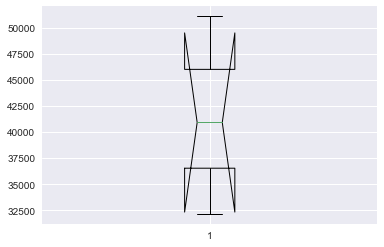

In [32]:
plt.boxplot(ntrials, conditions)

<Container object of 3 artists>

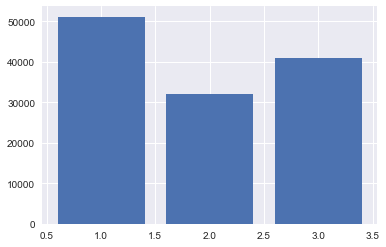

In [40]:
plt.bar([1,2,3], ntrials)